# 1. Perkenalan

**Graded Challenge 7**

Nama : Shinta Amalia

Batch : RMT-034

Dataset : [Kaggle](https://www.kaggle.com/datasets/khananikrahman/is-an-employee-wearing-safety-gear)

Objectives:

Proyek ini bertujuan menciptakan model yang dapat "melihat" apakah pekerja sudah memakai alat keselamatan atau belum. Model tersebut yaitu computer vision yang diharapkan dapat membantu perusahaan meningkatkan keselamatan kerja dengan cara yang lebih objektif dan efisien.

# 2. Import Libraries

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled ke

Downgrade berhasil dilakukan.  

In [2]:
# Import libraries

import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shutil import rmtree , copyfile

from sklearn.cluster import KMeans
import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from PIL import Image, ImageEnhance
from os import listdir , mkdir

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

import shutil

import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout

libraries berhasil di import

# 3. Data Loading

Data bersumber dari Kaggle sehingga akan dilakukan data loading dengan terlebih dahulu menghubungkan kaggle dengan collab.

In [3]:
# Install Kaggle library in Google Collaboratory

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory
!cp kaggle.json ~/.kaggle/

## Change permission for this directory :
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Collab dan kaggle berhasil terhubung

In [4]:
%%time
# Download Dataset
# Source dataset : https://www.kaggle.com/datasets/noobyogi0100/shoe-dataset

!kaggle datasets download -d khananikrahman/is-an-employee-wearing-safety-gear

Dataset URL: https://www.kaggle.com/datasets/khananikrahman/is-an-employee-wearing-safety-gear
License(s): apache-2.0
 97% 43.0M/44.2M [00:02<00:00, 23.9MB/s]
100% 44.2M/44.2M [00:03<00:00, 15.4MB/s]
CPU times: user 64.6 ms, sys: 6.91 ms, total: 71.5 ms
Wall time: 5.77 s


Dataset pada kaggle berhasil di download.

In [5]:
# Every dataset that downloaded from Kaggle, is in format `.zip`. So, we must unzip it before we can using the dataset.

!unzip ./is-an-employee-wearing-safety-gear.zip

Archive:  ./is-an-employee-wearing-safety-gear.zip
  inflating: GearedorNot/Not Wearing Safety Gear/0080ec4e-b1f9-44b3-94cc-29a90e67b151.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/01130d1d-3074-4403-b21a-a1f17cc4a5bf.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/052b64de-d694-4fe4-9079-7cc1ccdc394d.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/079fa843-2184-4d34-94db-e15baa76ad03.JPG  
  inflating: GearedorNot/Not Wearing Safety Gear/0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg  
  inflating: GearedorNot/Not Wearing Safety Gear/0c04e986-cce2-490f-af83-f0210ba66e4a.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/0c76fcf7-cc33-4ef3-a89f-32c288bfb811.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/10a411f9-76dc-44bf-9573-7ad7c83c6e44.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/13991cdf-2852-49c0-9813-8d090f980496.jpg  
  inflating: GearedorNot/Not Wearing Safety Gear/14d6d1e7-d42f-4177-91b9-e9c4aecd94bd.jpg  
  inflating: GearedorNot/Not

Karena dataset berbentuk folder zip maka dilakukan unzip sehingga file dapat terbuka.

In [6]:
# rename files in the "wearing-safety-gear" category
wear_sg = glob.glob("GearedorNot/Wearing Safety Gear/*")
num = 1
for wsg in wear_sg:
    file_name, file_ext = os.path.splitext(wsg)
    new_name = "GearedorNot/Wearing Safety Gear/wearsg_" + "{:03d}".format(num) + file_ext
    os.rename(wsg, new_name)
    num += 1

# rename files in the "not-wearing-safety-gear" category
notwear_sg = glob.glob("GearedorNot/Not Wearing Safety Gear/*")
num = 1
for nwsg in notwear_sg:
    file_name, file_ext = os.path.splitext(nwsg)
    new_name = "GearedorNot/Not Wearing Safety Gear/notwearsg_" + "{:03d}".format(num) + file_ext
    os.rename(nwsg, new_name)
    num += 1

Dilakukan penggantian nama file untuk memudahkan dalam EDA.

In [7]:
# list and length images of each category
wear_sg = glob.glob("GearedorNot/Wearing Safety Gear/*")
notwear_sg = glob.glob("GearedorNot/Not Wearing Safety Gear/*")

# sort list
wear_sg.sort()
notwear_sg.sort()

print("Wear Safety Gear : ", wear_sg)
print(f"Total Images    : {len(wear_sg)}")
print("")
print("Not Wear Safety Gear : ", notwear_sg)
print(f"Total Images    : {len(notwear_sg)}")

Wear Safety Gear :  ['GearedorNot/Wearing Safety Gear/wearsg_001.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_002.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_003.jpg', 'GearedorNot/Wearing Safety Gear/wearsg_004.jpg', 'GearedorNot/Wearing Safety Gear/wearsg_005.png', 'GearedorNot/Wearing Safety Gear/wearsg_006.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_007.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_008.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_009.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_010.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_011.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_012.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_013.jpg', 'GearedorNot/Wearing Safety Gear/wearsg_014.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_015.png', 'GearedorNot/Wearing Safety Gear/wearsg_016.jpg', 'GearedorNot/Wearing Safety Gear/wearsg_017.jpeg', 'GearedorNot/Wearing Safety Gear/wearsg_018.jpg', 'GearedorNot/Wearing Safety Gear/wearsg_019.jpeg', 'GearedorNot/Wear

Dalam dataset, terdapat dua kategori yaitu:
1. Wear Safety Gear sebanyak 161 images.
2. Not Wear Safety Gear sebanyak 195 images.

In [8]:
# create dataframe contains path of all images
all_files = wear_sg + notwear_sg
labels = ["wear" for i in range(len(wear_sg))] + ["notwear" for i in range(len(notwear_sg))]
df_img = pd.DataFrame({"images":all_files, "label":labels})
df_img = df_img.sample(len(df_img)).reset_index(drop=True)
df_img

images    label
0    GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear
1       GearedorNot/Wearing Safety Gear/wearsg_114.jpg     wear
2    GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear
3      GearedorNot/Wearing Safety Gear/wearsg_121.jpeg     wear
4      GearedorNot/Wearing Safety Gear/wearsg_067.jpeg     wear
..                                                 ...      ...
351    GearedorNot/Wearing Safety Gear/wearsg_117.jpeg     wear
352  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear
353  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear
354  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear
355  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear

[356 rows x 2 columns]

Dataframe dibuat untuk memudahkan pembacaan sehingga dapat diketahui

## 3.1 Data Exploration

### 3.1.1 Wear Safety Gear

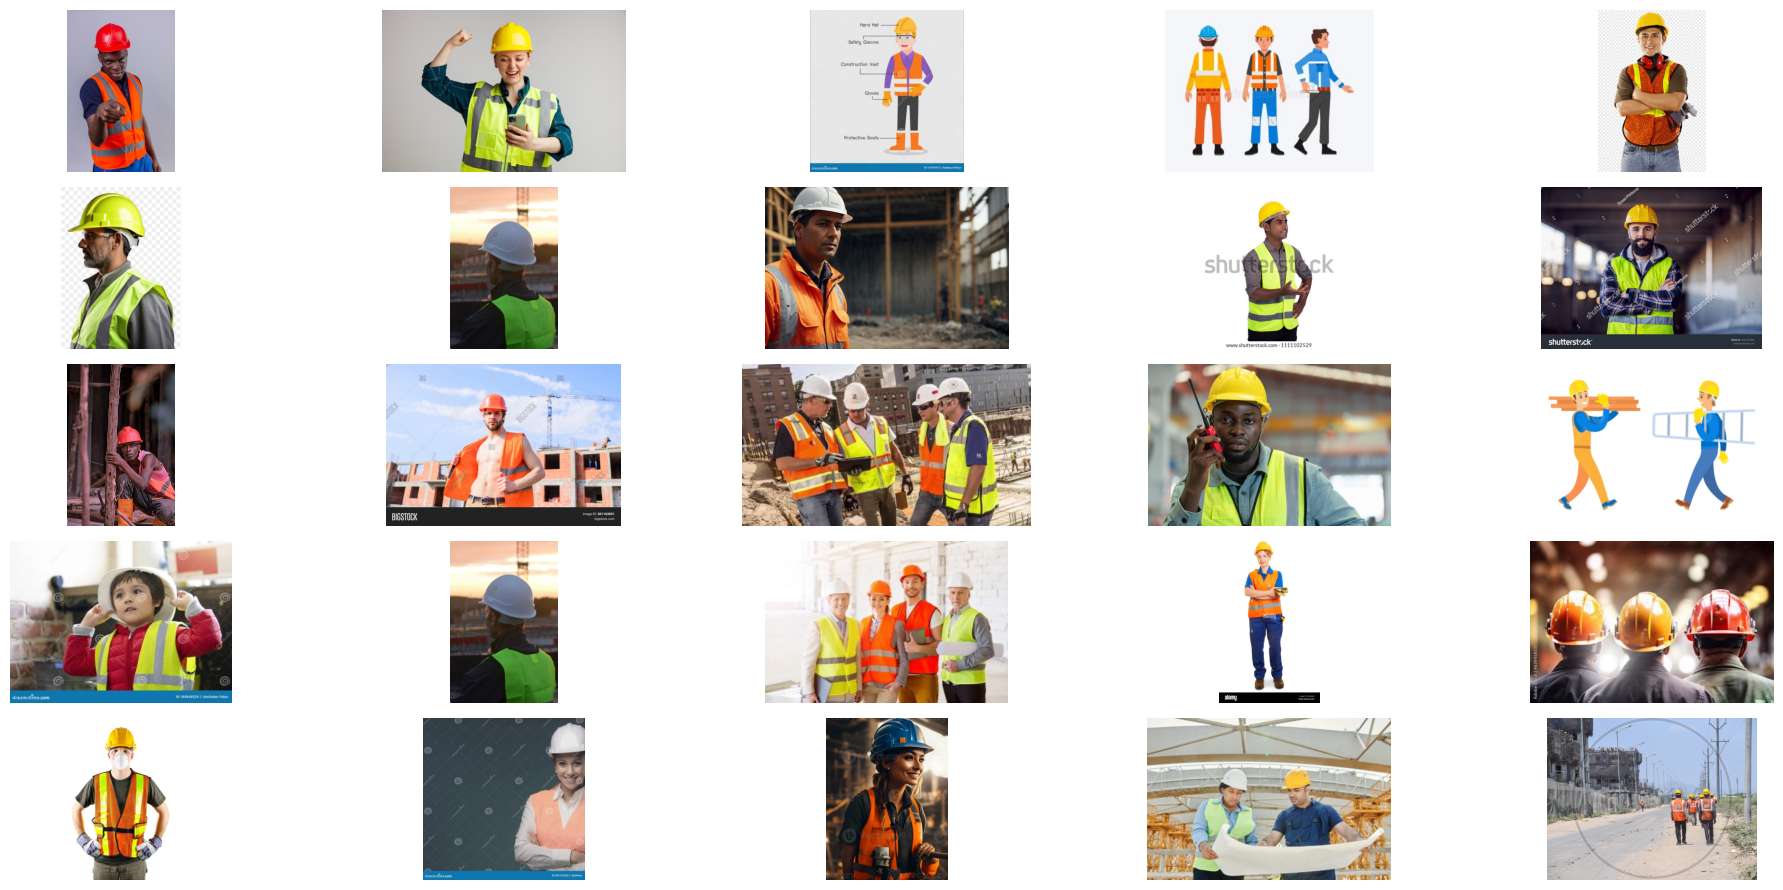

In [9]:
# show wear safety gear images
num_cols = 5
num_rows = 5
num_wear_sg_img = len(wear_sg)

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 9))

for i in range(num_rows):
    for j in range(num_cols):
        img_idx = i * num_cols + j
        if img_idx < num_wear_sg_img:
            wsg = plt.imread(wear_sg[img_idx])
            ax[i, j].imshow(wsg)
            ax[i, j].axis("off")
        else:
            ax[i, j].axis("off")

plt.tight_layout()

Data dilihat bahwa terdapat foto-foto orang atau individu **memakai safety gear**.Safety Gear yang dimaksud yaitu hard hat dan construction vest.

## 3.2. Not Wear Safety Gear Images

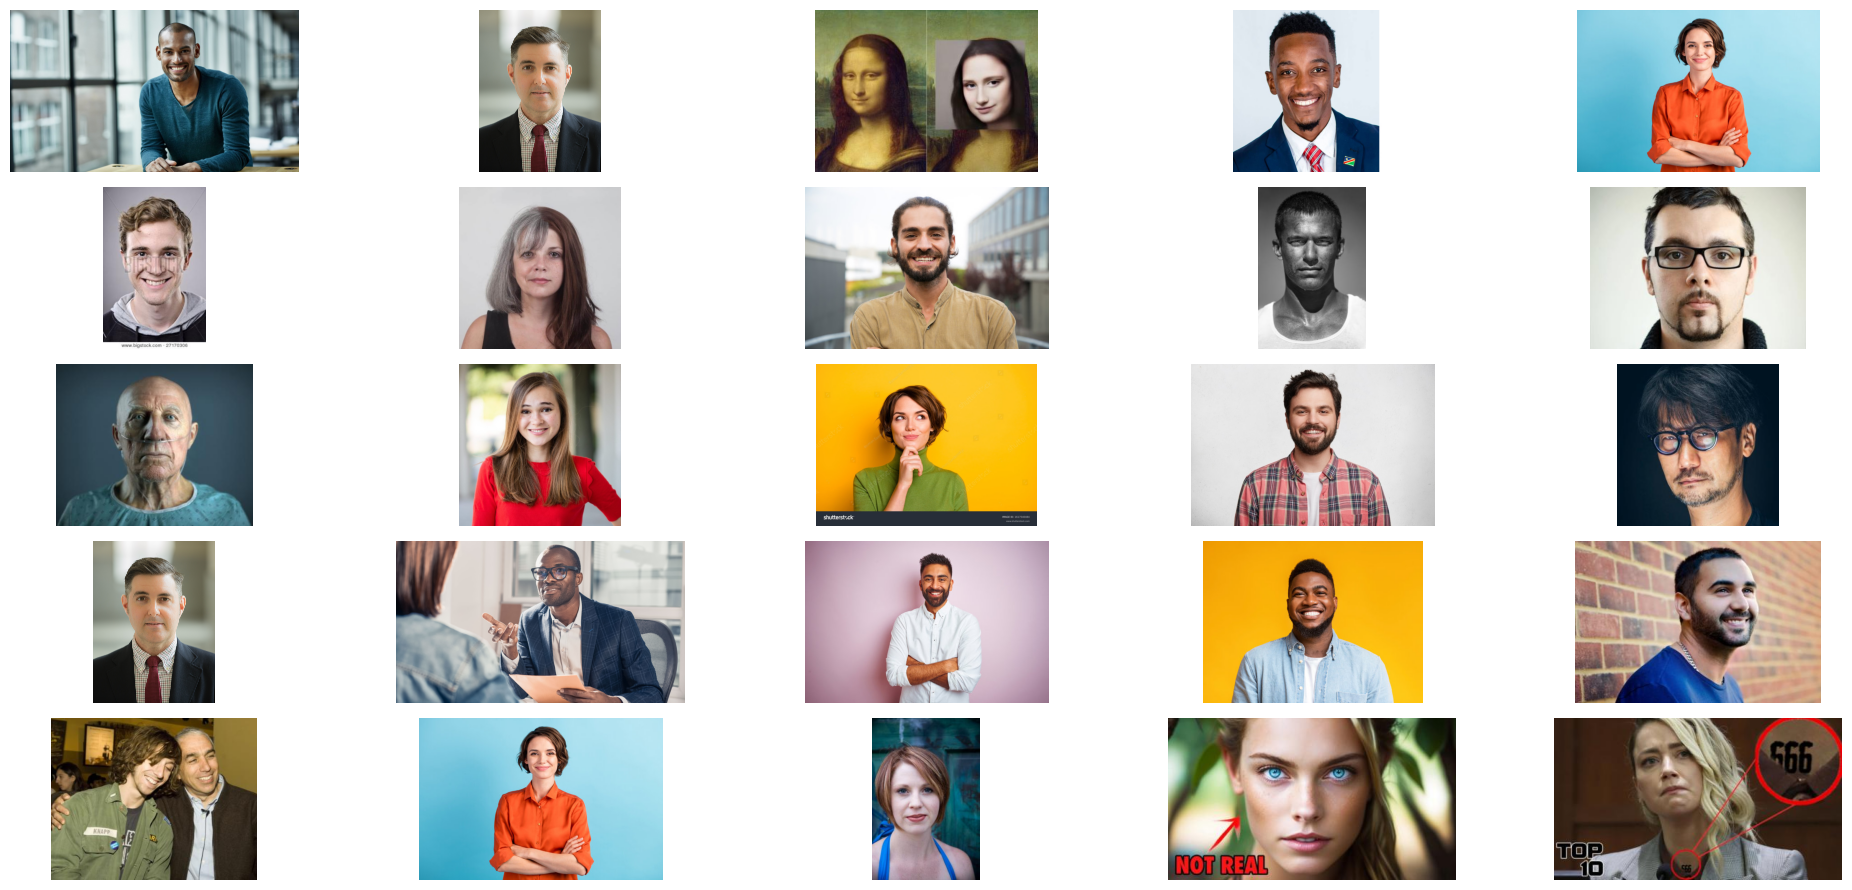

In [10]:
# show wear safety gear images
num_cols = 5
num_rows = 5
num_notwear_sg_img = len(notwear_sg)

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 9))

for i in range(num_rows):
    for j in range(num_cols):
        img_idx = i * num_cols + j
        if img_idx < num_wear_sg_img:
            wsg = plt.imread(notwear_sg[img_idx])
            ax[i, j].imshow(wsg)
            ax[i, j].axis("off")
        else:
            ax[i, j].axis("off")

plt.tight_layout()

Data dilihat bahwa terdapat foto-foto orang atau individu **tidak memakai safety gear**.Safety Gear yang dimaksud yaitu hard hat dan construction vest.

# 4. Exploratory Data Analysis (EDA)

## 4.1 Color

In [11]:
# init
mean_colors_wear = []
mean_colors_notwear = []

for path, label in zip(df_img["images"], df_img["label"]):
    image = cv2.imread(path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # average value for each color channel
    mean_color = image.mean(axis=(0,1))

    if label == "wear":
        mean_colors_wear.append(mean_color)
    else:
        mean_colors_notwear.append(mean_color)

# convert to array
mean_colors_wear = np.array(mean_colors_wear)
mean_colors_notwear = np.array(mean_colors_notwear)

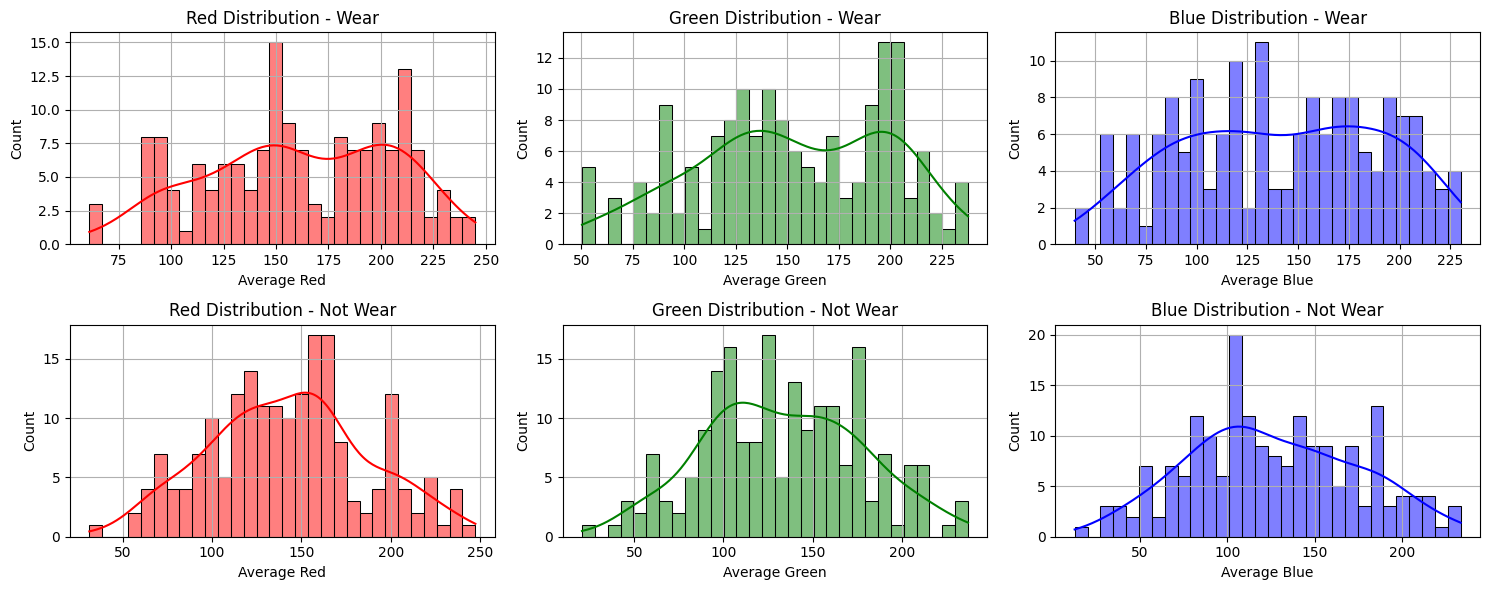

In [12]:
# plot
plt.figure(figsize=(15, 6))

channels = ["Red", "Green", "Blue"]
for i, channel in enumerate(channels):
    plt.subplot(2, 3, i+1)
    sns.histplot(mean_colors_wear[:, i], color=channel.lower(), bins=30, kde=True)
    plt.title(f"{channel} Distribution - Wear")
    plt.xlabel(f"Average {channel}")
    plt.grid(True)

    plt.subplot(2, 3, i+4)
    sns.histplot(mean_colors_notwear[:, i], color=channel.lower(), bins=30, kde=True)
    plt.title(f"{channel} Distribution - Not Wear")
    plt.xlabel(f"Average {channel}")
    plt.grid(True)

plt.tight_layout()
plt.show()

Dari diagram diatas dapat disimpulkan bahwa:

1. Distribusi Warna Merah:

  -  Pada kelas "wear" dan "not wear", distribusi intensitas warna merah menunjukkan keseragaman, tetapi dengan puncak yang berbeda. Di kelas "wear", intensitas warna merah lebih tersebar, sedangkan pada kelas "not wear", terdapat puncak distribusi yang lebih jelas di sekitar nilai 150.

  - Ini mungkin mengindikasikan bahwa gambar pada kategori "wear" memiliki variasi intensitas merah yang lebih tinggi, sementara gambar dalam kategori "not wear" memiliki intensitas merah yang lebih terkonsentrasi.

2. Distribusi Warna Hijau:

  - Distribusi warna hijau pada kelas "wear" juga menunjukkan rentang variasi yang luas dengan beberapa puncak. Sebaliknya, di kelas "not wear", terlihat adanya puncak distribusi yang dominan di kisaran 125 hingga 150.

  - Ini menunjukkan bahwa gambar dalam kategori "wear" menampilkan lebih banyak variasi dalam intensitas warna hijau dibandingkan kategori "not wear."

3. Distribusi Warna Biru:

  - Pada kelas "wear", distribusi warna biru cenderung lebih rata dengan puncak di antara nilai 100 hingga 150. Sedangkan di kelas "not wear", puncak distribusi warna biru lebih jelas dan terletak pada nilai yang lebih rendah sekitar 100.

  - Sebaliknya, di kelas "not wear", intensitas warna biru lebih terkonsentrasi di sekitar puncak tertentu, yang menunjukkan konsistensi lebih tinggi dalam distribusi warna biru di gambar-gambar ini.

## 4.2 Size

In [13]:
# init
heights = []
widths = []

# loop height and width
for img_path in df_img["images"]:
    with Image.open(img_path) as img:
        width, height = img.size
        widths.append(width)
        heights.append(height)

# add height and width
df_img["height"] = heights
df_img["width"] = widths
df_img

images    label  height  width
0    GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear     400    300
1       GearedorNot/Wearing Safety Gear/wearsg_114.jpg     wear     400    400
2    GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear     400    400
3      GearedorNot/Wearing Safety Gear/wearsg_121.jpeg     wear    1000    588
4      GearedorNot/Wearing Safety Gear/wearsg_067.jpeg     wear     417    626
..                                                 ...      ...     ...    ...
351    GearedorNot/Wearing Safety Gear/wearsg_117.jpeg     wear     640    640
352  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear     436    770
353  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear     400    265
354  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear     859    840
355  GearedorNot/Not Wearing Safety Gear/notwearsg_...  notwear    4000   6000

[356 rows x 4 columns]

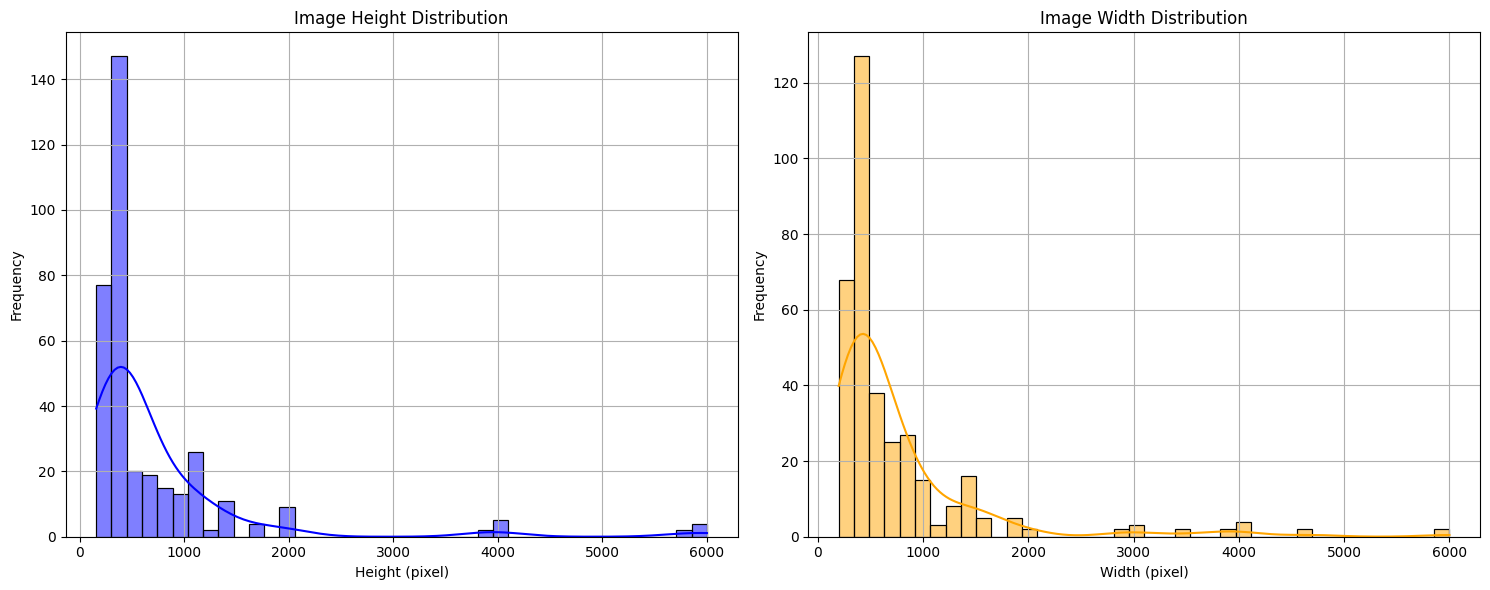

In [14]:
# plot height and width
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_img["height"], kde=True, bins=40, color="blue")
plt.title("Image Height Distribution")
plt.xlabel("Height (pixel)")
plt.ylabel("Frequency")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(df_img["width"], kde=True, bins=40, color="orange")
plt.title("Image Width Distribution")
plt.xlabel("Width (pixel)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.grid(True)
plt.show()


Gambar di atas menunjukkan dua histogram distribusi ukuran gambar berdasarkan height (tinggi) dan width (lebar) dalam satuan pixel. Dari gambar tersebut dapat diperoleh bahwa:

1. Distribusi Tinggi Gambar (Image Height Distribution)
  -  Mayoritas gambar memiliki tinggi di bawah 1000 pixel.
  -  Terdapat puncak yang tajam sekitar 500-600 pixel, menunjukkan bahwa sebagian besar gambar dalam dataset memiliki tinggi dalam kisaran ini.
  - Ada ekor distribusi yang panjang (skewed right) yang menunjukkan beberapa gambar memiliki tinggi yang jauh lebih besar, bahkan hingga sekitar 6000 pixel.
2. Distribusi Lebar Gambar (Image Width Distribution)
  - Mayoritas gambar memiliki lebar di bawah 1000 pixel.
  - Terdapat puncak yang cukup besar pada sekitar 500 pixel, menunjukkan bahwa banyak gambar yang lebarnya ada di sekitar ukuran tersebut.
  - Ada beberapa gambar dengan lebar yang sangat besar (hingga sekitar 6000 pixel), namun jumlahnya sedikit.

Kesimpulan:
Sebagian besar gambar dalam dataset berukuran relatif kecil, dengan ukuran tinggi dan lebar di bawah 1000 pixel.
Ada variasi ukuran yang cukup besar, namun hanya sedikit gambar yang memiliki dimensi (tinggi dan lebar) yang jauh lebih besar dari kebanyakan gambar lainnya, menghasilkan right skewed distribution. Distribusi ini menunjukkan bahwa mungkin ada ketidakkonsistenan dalam resolusi gambar di dataset, dengan sebagian besar gambar berukuran kecil dan beberapa gambar berukuran jauh lebih besar.

# 5. Feature Engineering

## 5.1 Split for Train, Validation, and Test Set

In [15]:
# Split Train, Validation, Test
base_dir = 'GearedorNot'
train_dir = os.path.join("train")
val_dir = os.path.join("val")
test_dir = os.path.join("test")

for category in ['Wearing Safety Gear', 'Not Wearing Safety Gear']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE=0.8):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(f"{filename} is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    validation_length = int(len(files) * ((1 - SPLIT_SIZE) / 2))
    testing_length = int(len(files) - training_length - validation_length)

    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    validation_set = shuffled_set[training_length:training_length + validation_length]
    testing_set = shuffled_set[training_length + validation_length:]

    for filename in training_set:
        shutil.copy(os.path.join(SOURCE, filename), os.path.join(TRAINING, filename))

    for filename in validation_set:
        shutil.copy(os.path.join(SOURCE, filename), os.path.join(VALIDATION, filename))

    for filename in testing_set:
        shutil.copy(os.path.join(SOURCE, filename), os.path.join(TESTING, filename))

split_data(os.path.join(base_dir, 'Wearing Safety Gear'), os.path.join(train_dir, 'Wearing Safety Gear'), os.path.join(val_dir, 'Wearing Safety Gear'), os.path.join(test_dir, 'Wearing Safety Gear'))
split_data(os.path.join(base_dir, 'Not Wearing Safety Gear'), os.path.join(train_dir, 'Not Wearing Safety Gear'), os.path.join(val_dir, 'Not Wearing Safety Gear'), os.path.join(test_dir, 'Not Wearing Safety Gear'))

Split dilakukan dengan membagi sebanyak 80% data untuk train_set, 10% untuk validation_set, dan 10% untuk test_set.


In [16]:
# Function to visualize the first 5 images from each class

def plot_images(path):
  labels = os.listdir(path)
  for label in labels:
    folder_path = os.path.join(path, label)
    fig = plt.figure(figsize=(20, 20))
    columns = 5
    rows = 1
    print('Class : ', label)
    images = os.listdir(folder_path)
    for index in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, index)
        image = plt.imread(os.path.join(folder_path, images[index]))
        plt.imshow(image)
        plt.axis("off")
    plt.show()

Class :  Not Wearing Safety Gear


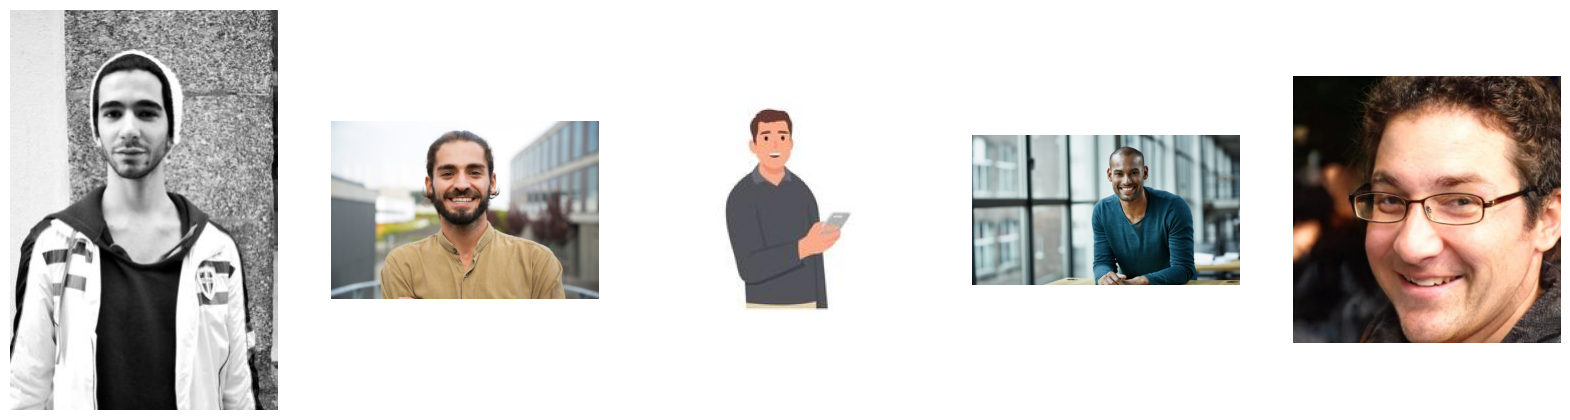

Class :  Wearing Safety Gear


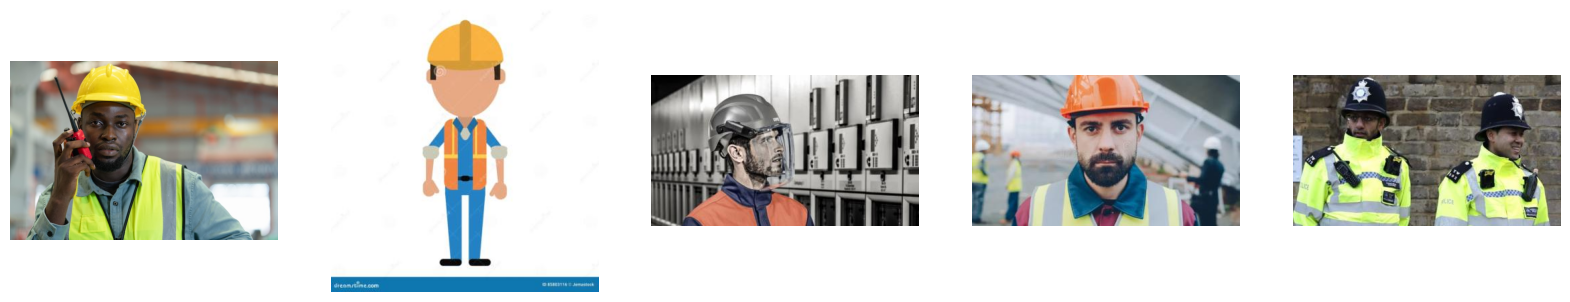

In [17]:
# Visualization of train_dir

plot_images(train_dir)

Gambar diatas menunjukkan foto-foto yang berada pada file train_dir.

Class :  Not Wearing Safety Gear


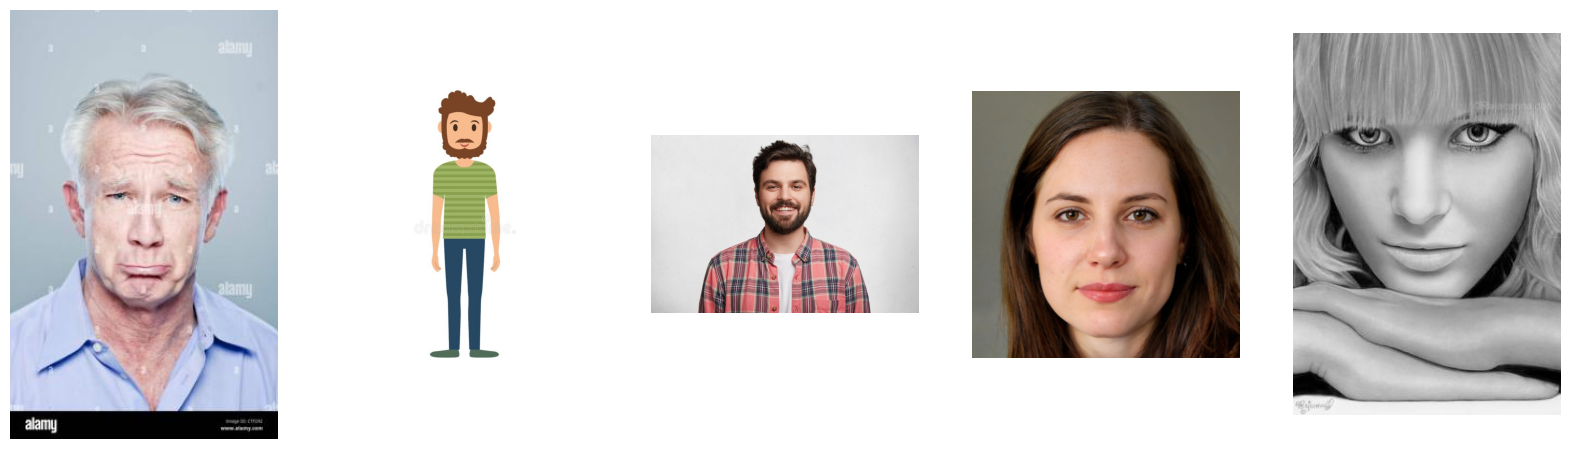

Class :  Wearing Safety Gear


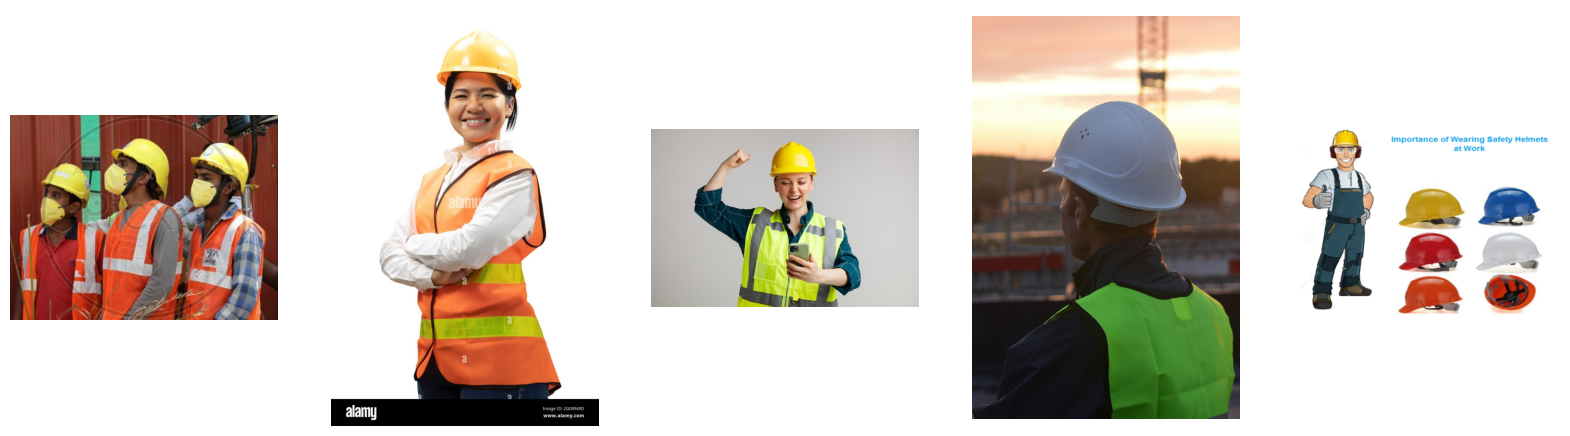

In [18]:
# Visualization of `test_dir`

plot_images(test_dir)

Gambar diatas menunjukkan foto-foto yang berada pada file test_dir.

Class :  Not Wearing Safety Gear


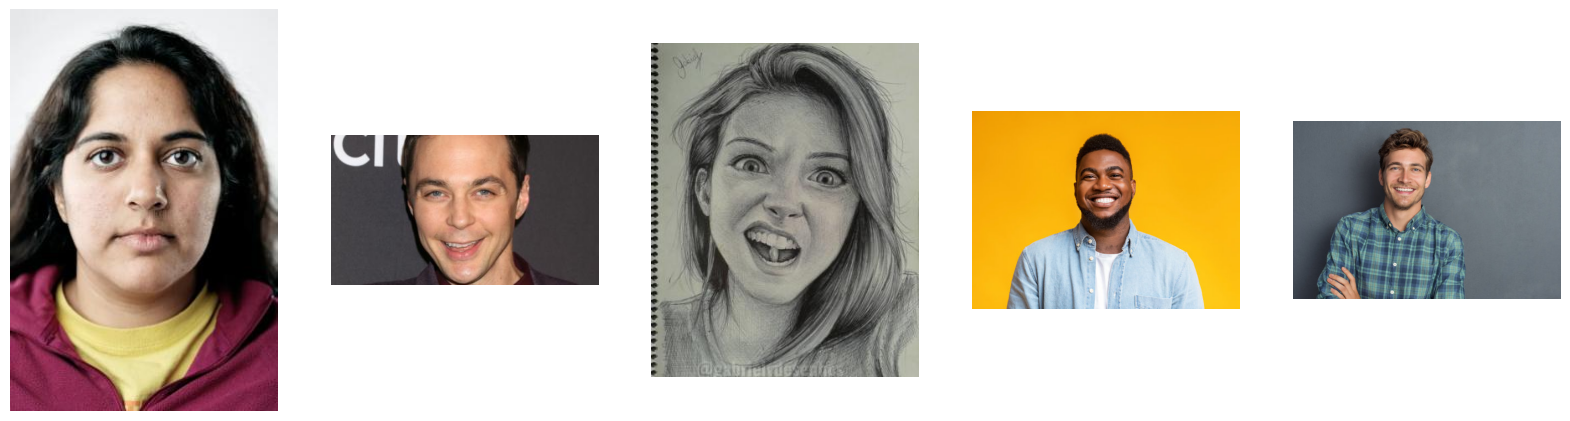

Class :  Wearing Safety Gear


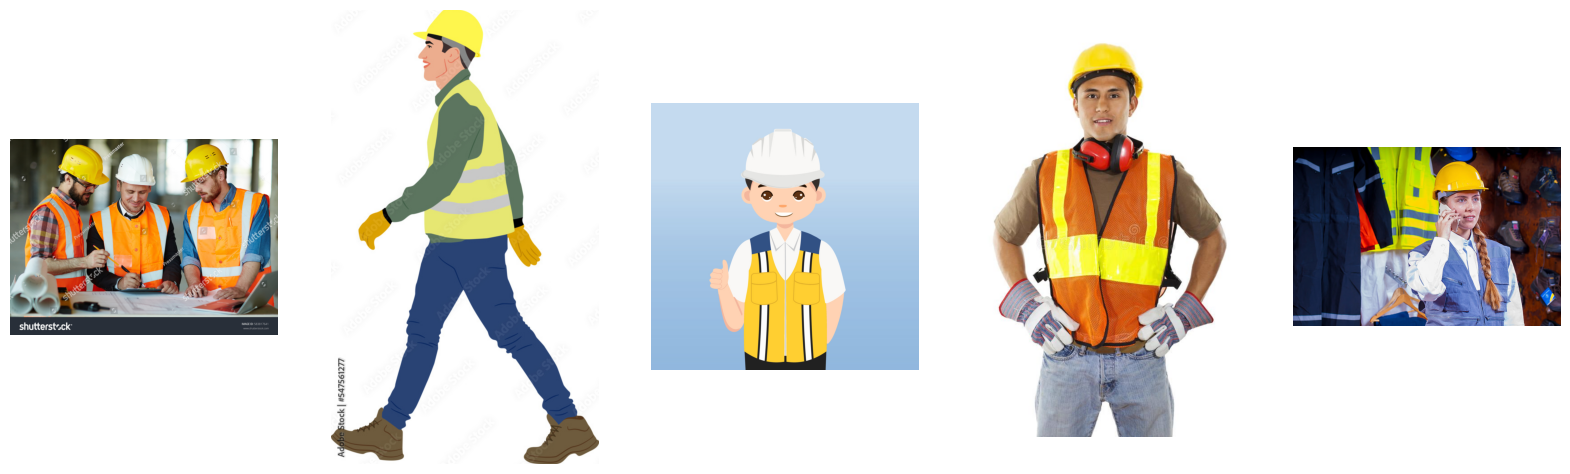

In [19]:
# Visualization of `val_dir`

plot_images(val_dir)

Gambar diatas menunjukkan foto-foto yang berada pada file val_dir.

## 5.2 Preprocessing


In [20]:
# Define hyperparameters

img_height = 224
img_width = 224
batch_size = 32

In [21]:
# Preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height ,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=2
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

validation_set = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height ,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height ,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=2
)

Found 283 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


Preprocessing yang dilakukan yaitu:
1. Normalisasi pixel gambar ke rentang [0, 1] membantu menstabilkan proses pelatihan model. Tanpa normalisasi ini, nilai piksel yang tinggi bisa menyebabkan gradien yang besar, yang berpotensi memperlambat atau bahkan menghentikan konvergensi model.

2. Rotasi gambar hingga 40 derajat memungkinkan model menjadi lebih kuat dalam mengenali objek dengan orientasi berbeda. Rotasi membantu model mengenali objek yang sama meskipun posisinya berbeda dalam gambar.

3. Pergeseran horizontal dan vertikal gambar hingga 20% memberikan kemampuan pada model untuk mendeteksi objek di berbagai posisi dalam gambar. Hal ini membantu model untuk tidak bergantung pada posisi pusat objek dalam gambar.

4. Shear hingga 20% mengubah sudut pandang gambar, sehingga memungkinkan model untuk mengenali objek meskipun terjadi distorsi perspektif atau sudut pandang yang miring.

5. Zoom gambar hingga 20% membantu model dalam mengenali objek dengan ukuran yang berbeda. Ini memungkinkan model untuk lebih adaptif terhadap variasi ukuran objek dalam dataset.

6. Membalik gambar secara horizontal memperluas variasi data dengan memberikan model gambar dalam orientasi cermin, yang meningkatkan kapasitas model untuk mengenali objek dengan lebih luas.

7. Fill mode digunakan untuk mengisi area kosong yang dihasilkan dari transformasi dengan piksel terdekat, sehingga menjaga integritas gambar dan menghindari artefak yang dapat mengganggu pelatihan model.

8. Preprocessing dilakukan pada train set yang terdiri dari 283 gambar, validation set yang terdiri dari 35 gambar, dan test set yang terdiri dari 37 gambar.

In [22]:
# Show labels

train_set.class_indices

{'Not Wearing Safety Gear': 0, 'Wearing Safety Gear': 1}

train_set sudah sesuai yang mana terbagi menjadi 2 kategori yaitu not wearing safety gear dan wearing safety gear.

# 6. ANN Training (Sequential API/Functional API)

## 6.1 Model Definition

In [23]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [24]:
# Create Sequential API model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

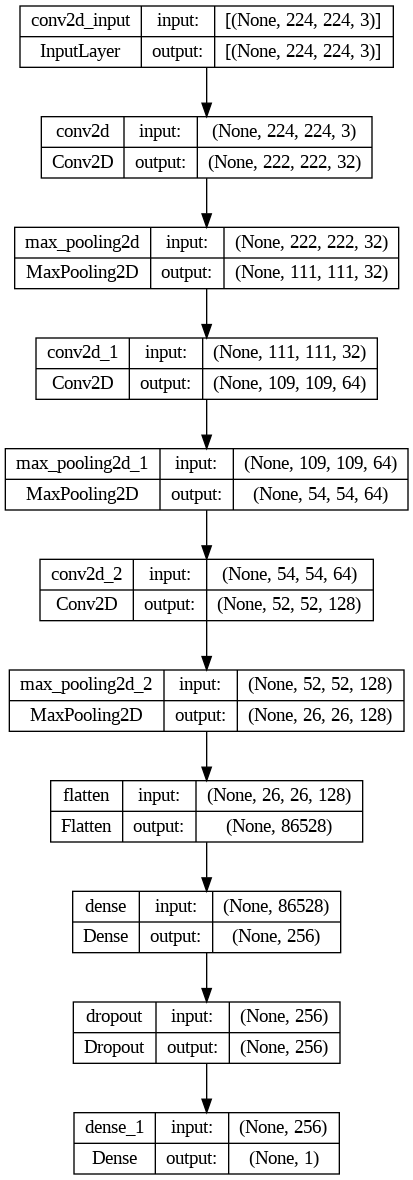

In [25]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

Penjelasan terkait model diatas yaitu:

- Model ini adalah Artificial Neural Network (ANN) sederhana yang dirancang untuk melakukan klasifikasi biner, yaitu mendeteksi apakah seseorang menggunakan alat perlindungan keselamatan (safety gear) atau tidak.

- Struktur model terdiri dari beberapa lapisan konvolusi yang diikuti oleh lapisan pooling. Setiap lapisan konvolusi menggunakan kernel berukuran 3x3, dengan jumlah filter yang bertambah secara bertahap dari 32 hingga 128, sementara lapisan pooling 2x2 berfungsi untuk secara efisien mengurangi dimensi data.

- Setelah melalui lapisan konvolusi dan pooling, data diubah menjadi vektor satu dimensi melalui lapisan Flatten, lalu diteruskan ke lapisan Dense dengan 256 neuron yang menggunakan fungsi aktivasi ReLU. Untuk mencegah overfitting, Dropout dengan rate 0,5 diterapkan dengan cara menonaktifkan setengah neuron secara acak selama proses pelatihan. Akhirnya, lapisan Dense dengan satu neuron dan aktivasi sigmoid digunakan untuk menghasilkan output berupa probabilitas prediksi.

- Model ini dikompilasi menggunakan binary_crossentropy sebagai fungsi loss dan Adam sebagai optimizer.

- Dihasilkan bahwa model memiliki total params: 22244929 (84.86 MB), Trainable params: 22244929 (84.86 MB), dan Non-trainable params: 0 (0.00 Byte)










## 6.2 Model Training

In [26]:
# Train the model

%%time
history = model.fit(train_set, epochs=10, validation_data=validation_set, batch_size=batch_size)

Epoch 1/10
9/9 [==============================] - 19s 841ms/step - loss: 3.3867 - accuracy: 0.4806 - val_loss: 0.6917 - val_accuracy: 0.4571
Epoch 2/10
9/9 [==============================] - 14s 1s/step - loss: 0.6937 - accuracy: 0.4346 - val_loss: 0.6922 - val_accuracy: 0.5143
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.6929 - accuracy: 0.5088 - val_loss: 0.6913 - val_accuracy: 0.4857
Epoch 4/10
9/9 [==============================] - 9s 1s/step - loss: 0.6940 - accuracy: 0.5230 - val_loss: 0.6920 - val_accuracy: 0.7143
Epoch 5/10
9/9 [==============================] - 8s 884ms/step - loss: 0.6928 - accuracy: 0.5936 - val_loss: 0.6916 - val_accuracy: 0.7714
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.6920 - accuracy: 0.6714 - val_loss: 0.6910 - val_accuracy: 0.7143
Epoch 7/10
9/9 [==============================] - 9s 961ms/step - loss: 0.7085 - accuracy: 0.4452 - val_loss: 0.6882 - val_accuracy: 0.4857
Epoch 8/10
9/9 [============

Dilakukan model training 10 epochs.

## 6.3 Model Evaluation

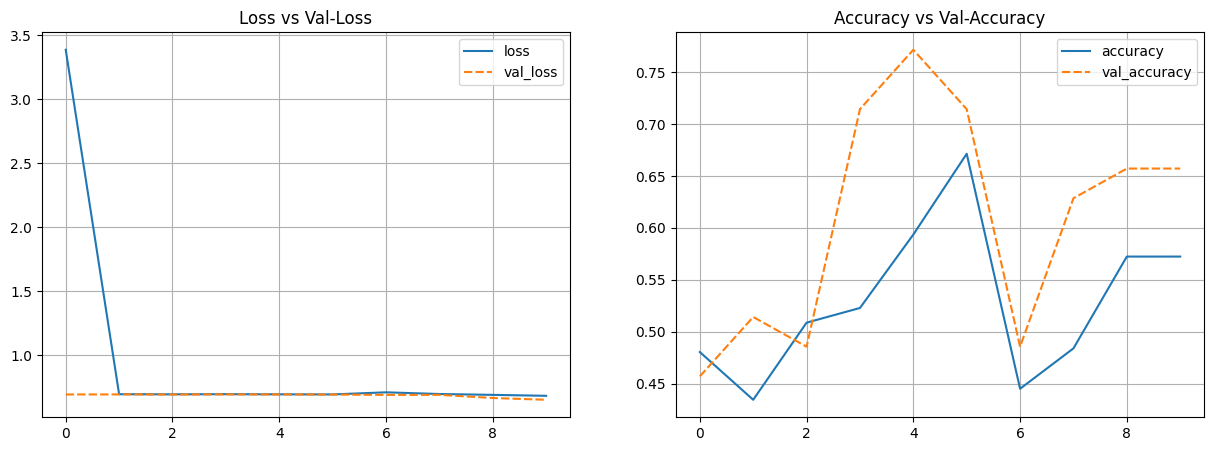

In [27]:
# Plot training results

history_t = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_t[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_t[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Dari gambar tersebut, terdapat dua grafik yang menampilkan perbandingan antara:

1. Loss vs Validation Loss (Grafik Kiri):

  - Garis biru menunjukkan training loss, sedangkan garis oranye putus-putus menunjukkan validation loss.
  - Pada awal training (epoch 1), nilai training loss sangat tinggi, kemudian turun tajam pada epoch 2. Setelah itu, baik training loss maupun validation loss menjadi stabil di kisaran rendah..
  - Ini menunjukkan bahwa model dengan cepat mencapai titik minimasi loss di awal, namun tidak ada perbedaan signifikan antara loss dan validation loss.

2. Accuracy vs Validation Accuracy (Grafik Kanan):

  - Garis biru menunjukkan training accuracy, sedangkan garis oranye putus-putus menunjukkan validation accuracy.
  - Pada epoch pertama, training accuracy rendah tetapi naik perlahan setelah beberapa epoch. Di sisi lain, validation accuracy menunjukkan fluktuasi yang lebih tinggi daripada training accuracy.

Berdasarkan grafik yang diberikan, model tampaknya mengalami overfitting. Hal ini terlihat dari penurunan val-accuracy setelah mencapai titik maksimum, sementara loss dan val-loss cenderung stabil atau sedikit meningkat.



In [28]:
# check train accuracy
train_loss_model, train_acc_model = model.evaluate(train_set)
print(f"Train loss: {train_loss_model}%")
print(f"Train accuracy: {train_acc_model * 100:.2f}%")

# check test accuracy
test_loss_model, test_acc_model = model.evaluate(test_set)
print(f"Test loss: {test_loss_model}%")
print(f"Test accuracy: {test_acc_model * 100:.2f}%")

9/9 [==============================] - 7s 788ms/step - loss: 0.6720 - accuracy: 0.6042
Train loss: 0.6719754934310913%
Train accuracy: 60.42%
2/2 [==============================] - 1s 313ms/step - loss: 0.6720 - accuracy: 0.6486
Test loss: 0.672048032283783%
Test accuracy: 64.86%


Dari hasil diatas diperoleh bahwa:

- Dari hasil evaluasi model, terlihat bahwa model memiliki akurasi sebesar 60.42% pada training set, yang menunjukkan kemampuan model dalam mengklasifikasikan sebagian besar gambar dengan benar pada data yang telah dilatih. Nilai loss pada training yang cukup rendah, menandakan bahwa kesalahan prediksi model relatif kecil dan model telah belajar pola dengan baik.

- Pada test set, model mencapai akurasi sebesar 64.86%, lebih rendah dari akurasi pada training set. Ini menunjukkan bahwa model dapat melakukan generalisasi dengan baik pada data yang tidak terlihat. Namun, nilai loss pada test set tidak beda jauh dengan train_set  menunjukkan bahwa model membuat kesalahan prediksi yang hampir sama dengan training set.


# 7. ANN Improvement (Sequential API/Functional API)

## 7.1 Improvement

### 7.1.1 Model Definition

In [29]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [30]:
# Create Sequential API model

model_aug = Sequential()

model_aug.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_height ,img_width, 3)))
model_aug.add(MaxPooling2D((2, 2)))

model_aug.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_aug.add(MaxPooling2D((2, 2)))


model_aug.add(Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_aug.add(MaxPooling2D((2, 2)))


model_aug.add(Conv2D(256, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_aug.add(MaxPooling2D((2, 2)))


model_aug.add(Conv2D(256, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_aug.add(MaxPooling2D((2, 2)))


model_aug.add(Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_aug.add(MaxPooling2D((2, 2)))


model_aug.add(Flatten())

model_aug.add(Dense(256, activation='relu'))
model_aug.add(Dropout(0.5))
model_aug.add(Dense(1, activation='sigmoid'))

# Compile
model_aug.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# callback for early stopping, model checkpoint and reduce learning rate
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("deployment/improved_model_2.keras", monitor="val_accuracy", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001)


model_aug.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

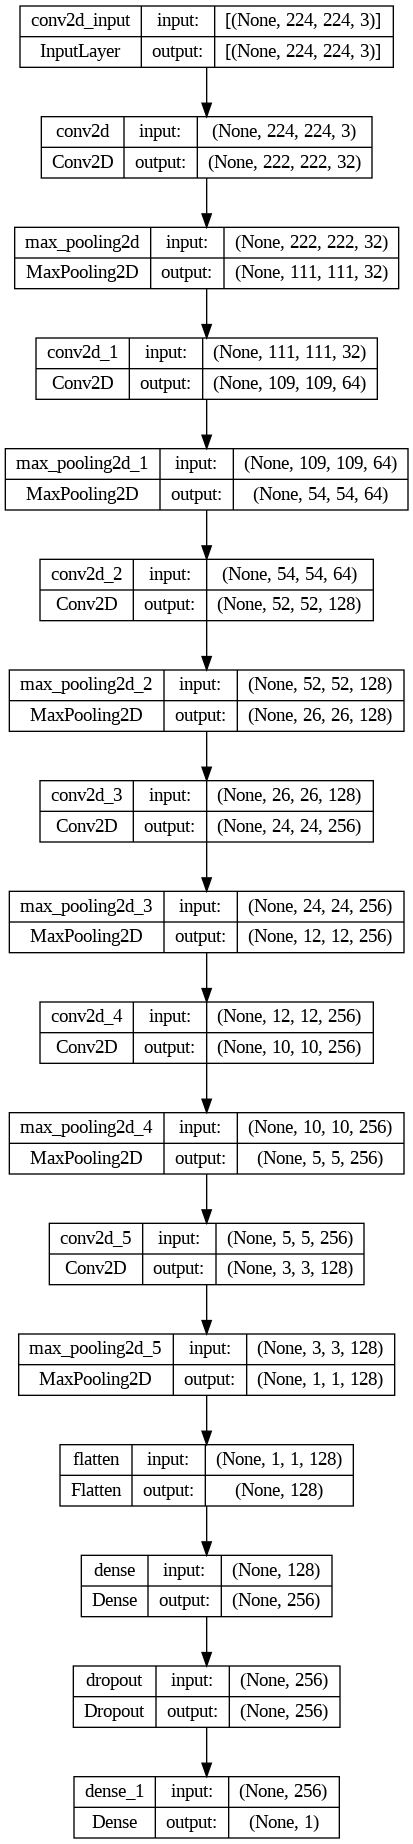

In [31]:
# Plot layers

tf.keras.utils.plot_model(model_aug, show_shapes=True)

Penjelasan terkait peningkatan model yaitu sebagai berikut:

- Dilakukan penambahan beberapa lapisan Conv2D dan MaxPooling2D, serta peningkatan jumlah filter hingga 256 di beberapa lapisan. Penambahan ini memungkinkan model untuk mempelajari fitur yang lebih mendalam dan kompleks dari gambar input, sehingga diharapkan dapat meningkatkan akurasi pada dataset yang lebih menantang.
- Dilakukan penambahan regularisasi L2 (dengan kernel_regularizer=l2(0.001))  pada beberapa lapisan untuk mencegah overfitting dengan memberi penalti pada bobot yang terlalu besar, mendorong model untuk tetap sederhana dan mampu melakukan generalisasi yang lebih baik pada data baru.
- Model juga menggunakan dropout dengan rate 0.5 pada lapisan dense, yang berfungsi untuk mencegah overfitting dengan secara acak menonaktifkan neuron selama proses pelatihan.
- Learning rate pada optimizer Adam sebesar 0.0001, memungkinkan penyesuaian bobot yang lebih lambat dan stabil, terutama pada model yang lebih kompleks.
- Ditambahkan callbacks dengan tujuan:
  - EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True) digunakan untuk menghentikan pelatihan secara otomatis jika performa model pada data validasi tidak membaik dalam beberapa epoch. Callback ini memonitor validation loss dan jika tidak ada perbaikan setelah 10 epoch (patience=10), maka pelatihan dihentikan untuk mencegah overfitting dan menghemat waktu komputasi.
  - ModelCheckpoint("deployment/improved_model_2.keras", monitor="val_accuracy", save_best_only=True) digunakan untuk menyimpan model terbaik selama pelatihan. Ini memonitor validation accuracy dan hanya menyimpan model jika ada perbaikan pada akurasi validasi (save_best_only=True).
  - ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001) digunakan untuk mengurangi learning rate jika model tidak menunjukkan perbaikan pada validation loss setelah beberapa epoch. Callback ini memonitor validation loss dan jika tidak ada perbaikan setelah 5 epoch (patience=5), maka learning rate dikurangi dengan faktor 0.2 (yaitu, learning rate dikalikan 0.2).

Dengan kombinasi penambahan lapisan, regularisasi, dan dropout ini, diharapkan model improved akan memiliki performa yang lebih baik dibandingkan base model, terutama dalam menghadapi data dengan tingkat kompleksitas dan detail yang tinggi.

### 7.1.2 Model Training

In [32]:
# Train the model

%%time
history_aug = model_aug.fit(train_set, epochs=50, validation_data=validation_set, callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/50
9/9 [==============================] - 12s 873ms/step - loss: 1.4103 - accuracy: 0.4558 - val_loss: 1.3873 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 2/50
9/9 [==============================] - 8s 894ms/step - loss: 1.3756 - accuracy: 0.5053 - val_loss: 1.3573 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 3/50
9/9 [==============================] - 10s 1s/step - loss: 1.3445 - accuracy: 0.5265 - val_loss: 1.3283 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 4/50
9/9 [==============================] - 9s 933ms/step - loss: 1.3159 - accuracy: 0.5194 - val_loss: 1.3004 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 5/50
9/9 [==============================] - 8s 886ms/step - loss: 1.2899 - accuracy: 0.5477 - val_loss: 1.2740 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 6/50
9/9 [==============================] - 8s 949ms/step - loss: 1.2620 - accuracy: 0.5194 - val_loss: 1.2482 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 7/50
9/9 [==============================] - 9s 996ms/

Dilakukan epochs sebanyak 50.

### 7.1.3 Model Evaluation

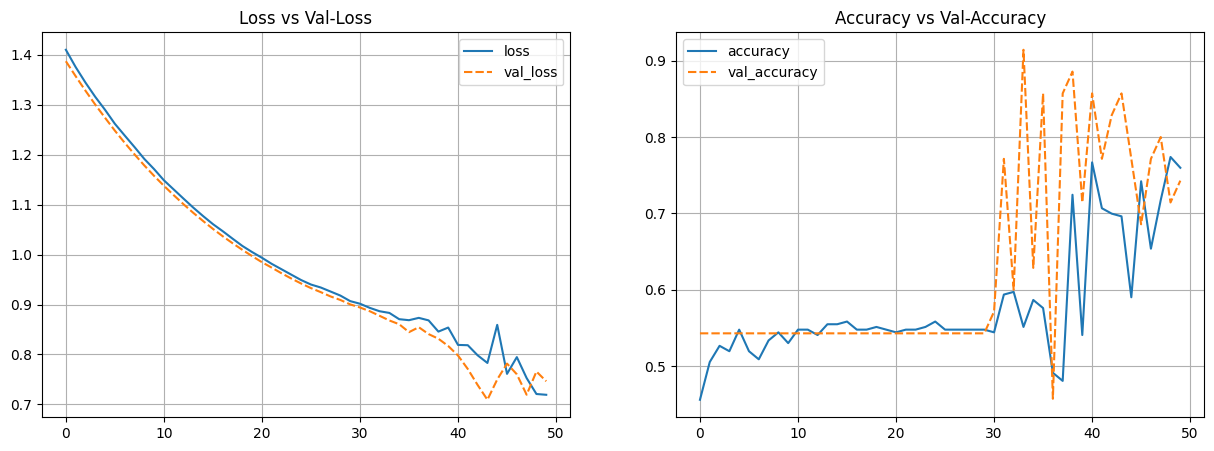

In [33]:
# Plot training results

history_aug_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_aug_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_aug_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Dari gambar tersebut, terdapat dua grafik yang menampilkan perbandingan antara:

1. Loss vs Validation Loss (Grafik Kiri):
    - Loss untuk training dan validation set menurun secara konsisten selama training hingga mendekati nilai rendah di akhir training. Menandakan bahwa model menjadi lebih baik dalam memprediksi selama pelatihan berlangsung.
    -  Nilai keduanya menurun secara umum, namun pada akhir pelatihan, val-loss menunjukkan sedikit kenaikan. Ini bisa menjadi tanda awal overfitting, meskipun tidak terlalu signifikan.


2. Loss vs Validation Loss (Grafik Kiri):
    
    - Val-accuracy terlihat sedikit lebih berfluktuasi dibandingkan accuracy. Ini juga dapat menjadi tanda potensi overfitting, di mana model bekerja sangat baik pada data pelatihan tetapi kurang konsisten pada data validasi.

Model ini menunjukkan peningkatan performa pada data pelatihan dan validasi, tetapi ada tanda-tanda overfitting yang mungkin perlu diatasi, seperti terlihat pada fluktuasi val-loss dan val-accuracy.

In [34]:
# check train accuracy
train_loss_model_aug, train_acc_model_aug = model_aug.evaluate(train_set)
print(f"Train loss: {train_loss_model_aug}%")
print(f"Train accuracy: {train_acc_model_aug * 100:.2f}%")

# check test accuracy
test_loss_model_aug, test_acc_model_aug = model_aug.evaluate(test_set)
print(f"Test loss: {test_loss_model_aug}%")
print(f"Test accuracy: {test_acc_model_aug * 100:.2f}%")

9/9 [==============================] - 7s 719ms/step - loss: 0.7077 - accuracy: 0.7774
Train loss: 0.7077122926712036%
Train accuracy: 77.74%
2/2 [==============================] - 1s 294ms/step - loss: 0.7675 - accuracy: 0.6757
Test loss: 0.767514169216156%
Test accuracy: 67.57%


Dari hasil diatas diperoleh bahwa:

- Terlihat bahwa model memiliki akurasi sebesar **77.74% meningkat dari yang sebelumnya 60.42% pada training set**, yang menunjukkan kemampuan model dalam mengklasifikasikan sebagian besar gambar dengan benar pada data yang telah dilatih.

- **Pada validation/test set, model mencapai akurasi sebesar 67.57% meningkat dari yang sebelumnya yaitu sebesar 64.86%**, lebih tinggi dari akurasi pada training set.

- Dari hasil pemodelan belum menghasilkan performa yang baik maka dari itu selanjutnya akan dicoba untuk pemodelan menggunakan transfer learning.

## 7.2. Improvement with Transfer Learning


Berdasarkan performa model sebelumnya, MobileNetV2 dipilih untuk transfer learning karena keunggulannya dalam efisiensi komputasi dan penggunaan memori. MobileNetV2 menawarkan performa tinggi dengan ukuran model yang kecil dan kecepatan inferensi yang cepat, menjadikannya ideal untuk deployment di perangkat dengan keterbatasan sumber daya. Arsitektur yang ringan namun tangguh membuatnya cocok untuk digunakan dalam situasi ini. Selain itu, MobileNetV2 sudah dilatih menggunakan dataset besar seperti ImageNet, memberikan dasar yang kuat untuk klasifikasi gambar melalui transfer learning. Model ini juga sangat fleksibel dan mudah diadaptasi untuk berbagai aplikasi, termasuk deteksi safety gear, tanpa memerlukan sumber daya komputasi yang besar.








### 7.2.1 Model Definition

In [35]:
# load MobileNetV2
base_model_tf = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model_tf.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [36]:
# base model
x = base_model_tf.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [37]:
# create model_tf
model_tf = Model(inputs=base_model_tf.input, outputs=predictions)

In [38]:
# compile model_tf
model_tf.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)


In [39]:
# callback for early stopping, model checkpoint and reduce learning rate
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("deployment/model_tf.keras", monitor="val_accuracy", save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001)

model_tf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

Model dengan transfer learning berhasil dibuat.

### 7.2.2. Model Training

In [40]:
# train model_tf (runtime about 5 mins)
history_model_tf = model_tf.fit(
    train_set,
    epochs=50,
    validation_data=validation_set,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Epoch 1/50
9/9 [==============================] - 15s 1s/step - loss: 1.3174 - accuracy: 0.4876 - val_loss: 1.0228 - val_accuracy: 0.5429 - lr: 1.0000e-04
Epoch 2/50
9/9 [==============================] - 9s 1s/step - loss: 1.1745 - accuracy: 0.4452 - val_loss: 0.8417 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 3/50
9/9 [==============================] - 8s 941ms/step - loss: 0.9503 - accuracy: 0.6184 - val_loss: 0.7556 - val_accuracy: 0.7429 - lr: 1.0000e-04
Epoch 4/50
9/9 [==============================] - 8s 888ms/step - loss: 0.8656 - accuracy: 0.6572 - val_loss: 0.6979 - val_accuracy: 0.7714 - lr: 1.0000e-04
Epoch 5/50
9/9 [==============================] - 10s 1s/step - loss: 0.8320 - accuracy: 0.7067 - val_loss: 0.6536 - val_accuracy: 0.8571 - lr: 1.0000e-04
Epoch 6/50
9/9 [==============================] - 8s 917ms/step - loss: 0.7731 - accuracy: 0.7527 - val_loss: 0.6042 - val_accuracy: 0.8857 - lr: 1.0000e-04
Epoch 7/50
9/9 [==============================] - 8s 800ms/step -

Digunakan epochs sebanyak 50.

### 7.2.3 Model Evaluation

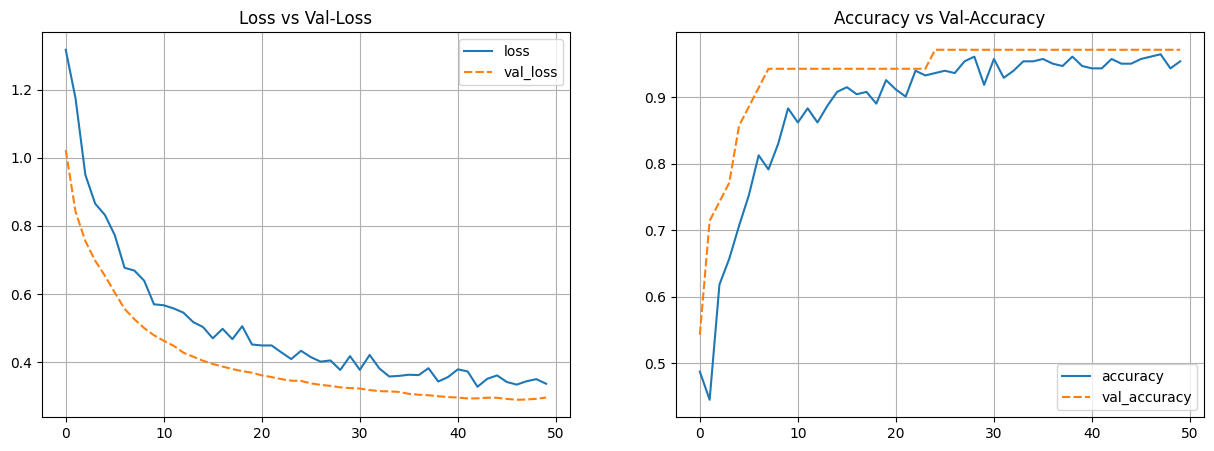

In [41]:
# Plot training results

history_model_df = pd.DataFrame(history_model_tf.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

Dari gambar tersebut, terdapat dua grafik yang menampilkan perbandingan antara:

1. Loss vs Validation Loss (Grafik Kiri):

  - Garis biru menunjukkan training loss, sedangkan garis oranye putus-putus menunjukkan validation loss.
  - Loss (garis biru) mengalami penurunan yang konsisten. Ini menunjukkan bahwa model terus belajar dan menyempurnakan prediksinya.
  - Val-Loss (garis oranye putus-putus) juga menunjukkan pola penurunan yang mirip, meskipun tetap sedikit lebih rendah dari loss pelatihan setelah beberapa epoch.
  - Loss dan val-loss mulai mendatar, yang mengindikasikan bahwa model mungkin telah menyatu (converge) dan tidak ada peningkatan signifikan lebih lanjut.


2. Accuracy vs Validation Accuracy (Grafik Kanan):

  - Garis biru menunjukkan training accuracy, sedangkan garis oranye putus-putus menunjukkan validation accuracy.
  - Accuracy (garis biru) meningkat dengan cepat pada awal pelatihan. Ini menunjukkan bahwa model belajar dengan sangat cepat.
  - Val-Accuracy (garis oranye putus-putus) tetap stabil mengindikasikan bahwa model memiliki kinerja yang sangat baik pada data validasi dan tidak mengalami overfitting.
  - Akurasi yang tinggi pada data pelatihan dan validasi serta kesesuaian antara kedua metrik menunjukkan bahwa model tersebut berkinerja optimal dan generalisasi yang baik pada data yang belum dilihat.

Dapat disimpulkan bahwa model ini memiliki kinerja yang sangat baik, dengan akurasi hampir sempurna dan loss yang rendah pada data pelatihan dan validasi. Tidak ada indikasi overfitting, karena loss dan akurasi pada data validasi mengikuti tren pelatihan dengan baik dan mungkin sudah mencapai performa optimal pada data yang diberikan.

In [42]:
# load model_tf.keras
best_model_tf = tf.keras.models.load_model("deployment/model_tf.keras")

# check training accuracy and loss (training set)
train_loss_model_improved, train_acc_model_improved = best_model_tf.evaluate(train_set)
print(f"Training loss: {train_loss_model_improved}")
print(f"Training accuracy: {train_acc_model_improved * 100:.2f}%")

# check test accuracy and loss (test set)
test_loss_model_improved, test_acc_model_improved = best_model_tf.evaluate(test_set)
print(f"Test loss: {test_loss_model_improved}")
print(f"Test accuracy: {test_acc_model_improved * 100:.2f}%")

9/9 [==============================] - 9s 837ms/step - loss: 0.3778 - accuracy: 0.9505
Training loss: 0.3777802586555481
Training accuracy: 95.05%
2/2 [==============================] - 1s 708ms/step - loss: 0.3663 - accuracy: 0.9459
Test loss: 0.3662951588630676
Test accuracy: 94.59%


Dapat diperoleh bahwa:

- Model mencapai akurasi yang sangat tinggi sebesar **95.05% pada training set lebih besar dari sebelumnya yaitu 77.74%**. Ini menunjukkan bahwa model sangat efektif dalam mempelajari pola dari data training, dengan kemampuan untuk mengklasifikasikan hampir semua gambar dengan benar.

- Model mencapai akurasi yang sangat tinggi sebesar**94.59% pada test set lebih besar dari sebelumnya yaitu 67.57%**. Ini menunjukkan bahwa model sangat efektif dalam mempelajari pola dari data training, dengan kemampuan untuk mengklasifikasikan hampir semua gambar dengan benar.

- Performa yang sangat mirip antara training dan validation set menunjukkan bahwa model tidak mengalami overfitting. Biasanya, overfitting terjadi ketika performa pada training set jauh lebih baik daripada pada validation set, tetapi di sini, kedua set menunjukkan performa yang sangat baik dan hampir identik.

2/2 [==============================] - 0s 41ms/step
Classification Report - Train Set:
                         precision    recall  f1-score   support

Not Wearing Safety Gear       0.99      0.95      0.97       155
    Wearing Safety Gear       0.95      0.98      0.97       128

               accuracy                           0.97       283
              macro avg       0.97      0.97      0.97       283
           weighted avg       0.97      0.97      0.97       283

Classification Report - test Set:
                         precision    recall  f1-score   support

Not Wearing Safety Gear       1.00      0.90      0.95        20
    Wearing Safety Gear       0.89      1.00      0.94        17

               accuracy                           0.95        37
              macro avg       0.95      0.95      0.95        37
           weighted avg       0.95      0.95      0.95        37



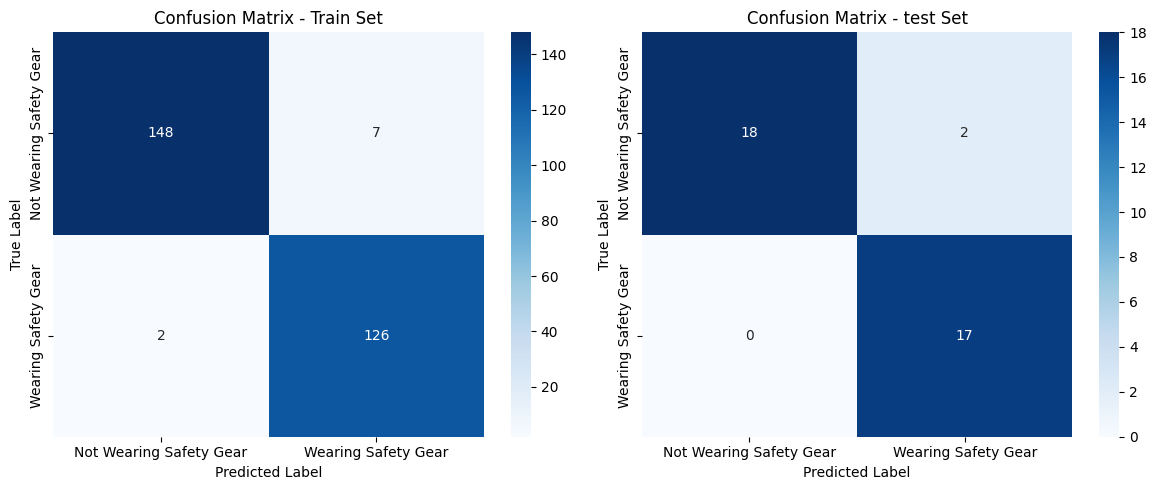

In [43]:
# predict training set
train_pred_prob = best_model_tf.predict(train_set)
train_pred_class = (train_pred_prob > 0.5).astype("int32").flatten()

# predict test set
test_pred_prob = best_model_tf.predict(test_set)
test_pred_class = (test_pred_prob > 0.5).astype("int32").flatten()

# true labels
y_train_true = train_set.labels
y_test_true = test_set.labels

# classification_report train set
print("Classification Report - Train Set:")
print(classification_report(y_train_true, train_pred_class, target_names=list(train_set.class_indices.keys())))

# classification_report test set
print("Classification Report - test Set:")
print(classification_report(y_test_true, test_pred_class, target_names=list(test_set.class_indices.keys())))

# confusion_matrix train set
cm_train = confusion_matrix(y_train_true, train_pred_class)

# confusion_matrix test set
cm_test = confusion_matrix(y_test_true, test_pred_class)

# confusion matrix display
plt.figure(figsize=(12, 5))

# confusion matrix train set
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=list(train_set.class_indices.keys()), yticklabels=list(train_set.class_indices.keys()))
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# confusion matrix test set
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=list(test_set.class_indices.keys()), yticklabels=list(test_set.class_indices.keys()))
plt.title("Confusion Matrix - test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

Berdasarkan perolehan diatas dapat disimpulkan bahwa:

- Semua metrik evaluasi (precision, recall, dan F1-score) memiliki nilai yang sangat tinggi, yaitu mendekati 1.0 untuk kedua kelas ("Not Wearing Safety Gear" dan "Wearing Safety Gear").

- Precision dan recall yang tinggi pada /kedua kelas menunjukkan bahwa model hampir tidak membuat kesalahan klasifikasi, baik itu dalam bentuk false positives maupun false negatives.

- Confusion matrix pada training set  menunjukkan bahwa model salah mengklasifikasikan 7 gambar dari "Not Wearing Safety Gear" ke "Wearing Safety Gear" dan 2 gambar dari "Wearing Safety Gear" ke "Not Wearing Safety Gear" sedangkan pada test set menunjukkan bahwa model salah mengklasifikasikan 2 gambar dari "Not Wearing Safety Gear" ke "Wearing Safety Gear" dan 0 gambar dari "Wearing Safety Gear" ke "Not Wearing Safety Gear"


- Model ini menunjukkan performa yang jauh lebih unggul dibandingkan dengan model-model sebelumnya, dengan akurasi yang hampir sempurna dan loss yang sangat rendah pada kedua set data. Tidak ada tanda-tanda overfitting atau underfitting, dan model ini sangat berhasil dalam mempelajari pola dari data training sekaligus menjaga kemampuan generalisasi yang sangat baik pada data yang tidak terlihat. Oleh karena itu, model ini merupakan model yang terbaik di antara ketiga model dan merupakan pilihan yang sangat kuat untuk digunakan pada inferencing.




# 8. Model Saving

Model dengan transfer learning menggunakan MobileNetV2 adalah yang terbaik di antara model lainnya. Model tersebut memberikan performa yang paling stabil dan akurat dengan waktu pelatihan yang lebih singkat, menunjukkan bahwa transfer learning adalah pendekatan yang sangat efektif untuk tugas klasifikasi yang dihadapi. Oleh karena itu, model yang akan disimpan dan digunakan untuk inferencing adalah model dengan transfer learning.

Proses penyimpanan model sudah dilakukan dengan metode ModelCheckpoint dari model terbaik pada proses train model transfer learning (model_tf). Berikut adalah summary dari model_tf yang telah disimpan.

In [44]:
# improved_model_2.keras summmary
model_inf = tf.keras.models.load_model("deployment/model_tf.keras")
model_inf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

# 9. Model Inference

In [46]:
# path saved model
model_path = "deployment/model_tf.keras"

# load model
model = tf.keras.models.load_model(model_path)

# preprocessing parameter
target_size = (224, 224)
rescale = 1./255

# ImageDataGenerator preprocessing
infer_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=rescale
)

# images to test
img_paths = ["inf/safety.jpg",
             "inf/shawn_mendes.jpg"]

# loop images
for img_path in img_paths:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)

    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = infer_datagen.standardize(img_array)

    # predict
    prediction = model.predict(img_array)

    # predict result
    print(f"Prediction for {img_path}: {prediction}")
    if prediction[0] > 0.5:
        print(f"The image {img_path} \n is classified as Wearing Safety Gear.")
        print("")
    else:
        print(f"The image {img_path} \n is classified as Not Wearing Safety Gear.")
        print("")

1/1 [==============================] - 2s 2s/step
Prediction for inf/safety.jpg: [[0.9967706]]
The image inf/safety.jpg 
 is classified as Wearing Safety Gear.

1/1 [==============================] - 0s 21ms/step
Prediction for inf/shawn_mendes.jpg: [[0.02902045]]
The image inf/shawn_mendes.jpg 
 is classified as Not Wearing Safety Gear.



Klasifikasi sudah sesuai.

# 10. Pengambilan Kesimpulan

## 10.1 Based on EDA

Dari EDA yang telah dilakukan, dapat disimpulkan bahwa:
1. Pada kategori "wear", distribusi warna merah, hijau, dan biru menunjukkan variasi yang lebih tinggi dibandingkan dengan kategori "not wear". Pada warna merah, intensitas pada kategori "wear" lebih tersebar, sedangkan pada kategori "not wear" terlihat lebih terkonsentrasi di sekitar nilai 150. Untuk warna hijau, kategori "wear" memiliki variasi yang luas dengan beberapa puncak, sementara kategori "not wear" menunjukkan puncak distribusi dominan antara nilai 125 hingga 150. Sementara itu, pada warna biru, distribusi di kategori "wear" lebih merata, berbeda dengan kategori "not wear" yang lebih terkonsentrasi di sekitar nilai 100. Hal ini mengindikasikan bahwa gambar-gambar pada kategori "wear" memiliki variasi intensitas warna yang lebih besar, sedangkan kategori "not wear" menunjukkan konsistensi yang lebih tinggi dalam distribusi warna.

2. Sebagian besar gambar dalam dataset berukuran relatif kecil, dengan ukuran tinggi dan lebar di bawah 1000 pixel.
Ada variasi ukuran yang cukup besar, namun hanya sedikit gambar yang memiliki dimensi (tinggi dan lebar) yang jauh lebih besar dari kebanyakan gambar lainnya, menghasilkan right skewed distribution. Distribusi ini menunjukkan bahwa mungkin ada ketidakkonsistenan dalam resolusi gambar di dataset, dengan sebagian besar gambar berukuran kecil dan beberapa gambar berukuran jauh lebih besar.








## 10.2 Based on Model

Berdasarkan model yang telah dibuat diperoleh bahwa:
- Pertama, dilakukan model ini adalah Artificial Neural Network (ANN) sederhana dan dihasilkan akurasi pada train set sebesar 60.42% dan test set sebesar 64.86%.
- Karena hasil pertama dinilai belum maksimal maka dilakukan improvement dengan menambahkan layer dan lain sebagainya sehingga hasilnya meningkat menjadi 77.74% untuk train set dan 67.57% namun ada kecenderungan overfitting.
- Untuk mengatasi overfitting tersebut dilakukan improvement dengan transfer learning menggunakan MobileNetV2 sehingga diperoleh peningkatan hasil yaitu 95.05% pada train set dan 94.59% pada test set dan model dinyatakan tidak overfit maupun underfit.
- Dari ketiga model tersebut maka model dengan transfer learning menggunakan MobileNetV2 dipilih sebagai model terbaik karena hasil yang optimal.


## 10.3 Business Insight

Saran untuk perusahaan:

- Integrasikan model ke sistem pengawasan atau aplikasi mobile untuk pemantauan kepatuhan terhadap standar keselamatan secara real-time.
- Lakukan pemantauan dan pembaruan berkala karena data dunia nyata lebih kompleks dan dapat mempengaruhi kinerja model. Jika ada tanda penurunan performa atau perubahan operasional, model perlu dilatih ulang dengan data baru. Pengujian lebih lanjut dengan regularisasi, tuning hyperparameter, atau arsitektur model lain juga dapat dilakukan untuk optimasi tambahan.


## 10.4 Recommendation for Next Modelling

Untuk meningkatkan model, disarankan menambahkan gambar orang dengan helm untuk motor, sepeda, skateboard, dan helm lainnya ke dalam kategori "Not Wearing Safety Gear" dengan tujuan agar model mempelajari bahwa helm-helm tersebut bukanlah perlengkapan keselamatan.

## 10.5 Conclusion

Untuk dapat membantu perusahaan meningkatkan keselamatan kerja dengan cara yang lebih objektif dan efisien pada kedisplinan pengunaan safety gear maka dilakukan permodelan computer vision dengan transferflow MobileNetV2. Berdasarkan permodelan tersebut diperoleh akurasi pada train set sebesar 95.05% dan test set sebesar 94.59% serta model dinyatakan tidak overfitting. Dengan demikian, model dapat diintegrasikan ke sistem pengawasan atau aplikasi mobile untuk pemantauan kepatuhan terhadap standar keselamatan secara real-time.
